In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
fpath = "data/out0.csv"
df = pd.read_csv(fpath)
df.head()

,DELAY,ITER,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,AVERAGE_TPS_BENCH2,AVERAGE_DROPRATE_BENCH2
0,0.0,0,21.555958,0.0,24.237686,0.0
1,0.0,1,21.960638,0.0,21.859503,0.0
2,0.0,2,21.550198,0.0,21.985533,0.0
3,0.0,3,22.026299,0.0,22.137806,0.0
4,0.0,4,21.946860,0.0,21.997543,0.0


In [3]:
atb1 = []
atb2 = []

for i in range(10):
    df_exp = df[i*10:(i+1)*10]
    atb1.append(df_exp["AVERAGE_TPS_BENCH1"].values)
    atb2.append(df_exp["AVERAGE_TPS_BENCH2"].values)
    

In [4]:
atb1

[array([21.555958, 21.960638, 21.550198, 22.026299, 21.94686 , 21.57916 ,
        21.54888 , 21.849283, 21.796194, 18.885042]),
 array([22.306854, 21.522001, 21.535412, 21.613005, 21.599428, 22.011097,
        24.226652, 21.221056, 24.442917, 21.57201 ]),
 array([22.399927, 21.403025, 21.531393, 24.42514 , 21.93856 , 21.809546,
        24.44971 , 21.790442, 21.537453, 21.953497]),
 array([21.302696, 22.514935, 18.735264, 21.45026 , 24.306633, 21.882877,
        21.543364, 18.78833 , 21.550854, 22.023966]),
 array([21.942753, 21.55031 , 23.640314, 18.855865, 22.642954, 20.50273 ,
        20.327427, 21.551836, 21.266344, 21.221432]),
 array([21.512606, 19.987785, 23.950768, 18.997765, 18.297709, 21.54177 ,
        21.264732, 21.557545, 20.470163, 21.572916]),
 array([21.587059, 20.326763, 21.266212, 21.666159, 21.816376, 21.610771,
        21.62759 , 21.598507, 21.947441, 24.470932]),
 array([18.903582, 25.107891, 21.5449  , 21.568203, 20.916895, 20.483067,
        17.29926 , 21.831594, 

In [5]:
from scipy.stats import ks_2samp, epps_singleton_2samp


ks_2samp_list = [ks_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]
epps_2samp_list = [epps_singleton_2samp(atb1[i], atb2[i]) for i in range(len(atb1))]

Text(0, 0.06, 'p_value = 0.05')

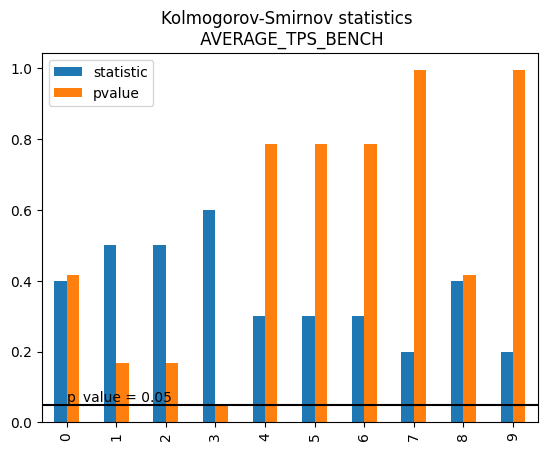

In [6]:
df_k2 = pd.DataFrame(ks_2samp_list)
df_epps = pd.DataFrame(epps_2samp_list)


df_k2.plot(kind = "bar",title = "Kolmogorov-Smirnov statistics \n AVERAGE_TPS_BENCH")
plt.hlines(0.05, xmin = -1, xmax = 10, color = 'black')
plt.text(0, 0.06, "p_value = 0.05")

In [7]:
df_epps.pvalue

0    0.506910
1    0.490531
2    0.229756
3    0.018513
4    0.475910
5    0.568743
6    0.473532
7    0.490944
8    0.480866
9    0.839403
Name: pvalue, dtype: float64

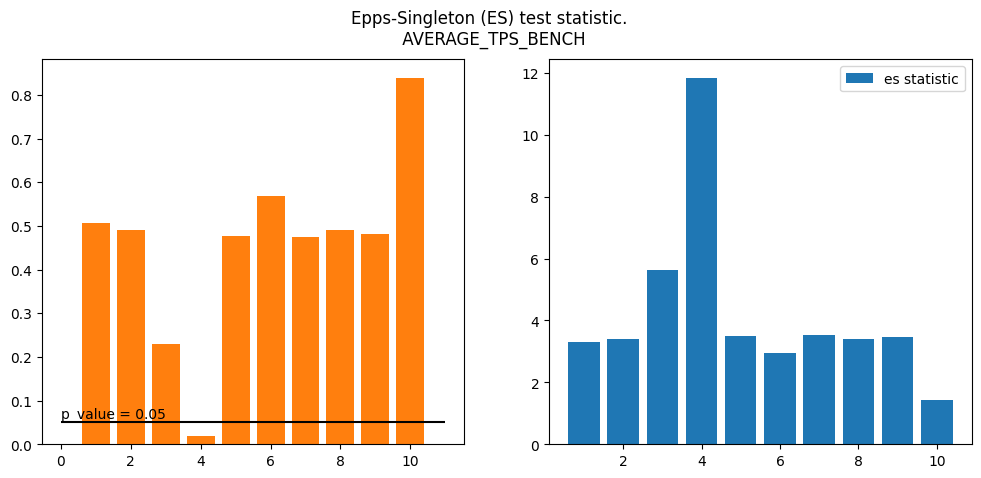

In [8]:
fig, axx = plt.subplots(1,2, figsize = (12,5))

plt.suptitle("Epps-Singleton (ES) test statistic. \n AVERAGE_TPS_BENCH")
axx[0].bar(range(1,11), df_epps.pvalue, label = "pvalue", color = "#ff7f0e")
axx[0].hlines(0.05, xmin = 0, xmax = 11, color = 'black')
axx[0].text(0, 0.06, "p_value = 0.05")
axx[1].bar(range(1,11), df_epps.statistic, label = "es statistic")
plt.legend()

# SLHC desigh 4 variance

In [172]:
fpath1 = "data/out_slhc_design_for_variance.csv"
df1 = pd.read_csv(fpath1)
df1

,ITER,NUM_THREADS,DEFAULT_TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,DEFAULT_HASHES_PER_SECOND,DEFAULT_TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,60.0,950.0,1017.0,1900000.0,168.0,23.664347,0.0,15484,233,55
1,1,3.0,60.0,950.0,1017.0,1900000.0,168.0,23.665918,0.0,15399,177,88
2,2,3.0,60.0,950.0,1017.0,1900000.0,168.0,23.665033,0.0,15304,177,112
3,3,3.0,60.0,950.0,1017.0,1900000.0,168.0,23.807890,0.0,15291,223,60
4,4,3.0,60.0,950.0,1017.0,1900000.0,168.0,23.949690,0.0,15256,208,82
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,5.0,66.0,1050.0,983.0,2100000.0,152.0,23.095373,0.0,15795,263,45
96,6,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.604181,0.0,14453,173,96
97,7,5.0,66.0,1050.0,983.0,2100000.0,152.0,23.095528,0.0,15194,146,141
98,8,5.0,66.0,1050.0,983.0,2100000.0,152.0,26.936148,0.0,14480,211,54


In [173]:
av_tps_bench1_list = []

for i in range(10):
    df1_exp = df1[i*10:(i+1)*10]
    av_tps_bench1_list.append(df1_exp["AVERAGE_TPS_BENCH1"].values)

In [182]:
atb1_df

,samp1,samp2,samp3,samp4,samp5,samp6,samp7,samp8,samp9,samp10
0,23.664347,23.665918,23.665033,23.807890,23.949690,24.088829,23.658924,23.663895,23.661457,23.522158
1,23.379206,23.236500,23.235163,23.236440,23.235880,23.237719,23.234392,23.234808,27.241678,23.234587
2,23.663496,23.238363,26.772630,23.091608,23.375553,20.615090,23.236078,23.519138,23.236855,23.377880
3,23.238081,23.807997,23.236954,23.377882,23.379435,23.378307,23.661470,23.378555,23.379763,23.945877
4,23.094412,22.950426,23.235500,22.806053,22.808740,22.443071,22.813187,22.950920,22.810747,22.953331
5,23.808048,23.524313,23.523516,23.379242,20.945705,23.380432,23.517702,23.520575,23.522202,23.519869
6,23.096066,22.951050,22.947903,23.095459,23.238377,22.952581,22.953712,22.949541,20.447718,22.952232
7,23.090858,23.095022,23.093000,26.936722,22.948082,23.096970,23.094048,23.237663,22.441190,23.379656
8,23.952400,26.746042,23.948875,23.525505,23.522005,23.523483,26.504154,23.518929,23.810448,23.238852
9,23.380724,23.093006,23.382256,23.096073,23.095577,23.095373,26.604181,23.095528,26.936148,23.092285


In [211]:
row_means = atb1_df.mean(axis=1).values

# Calculate the mean of each column (N = 10 samples)
col_means = atb1_df.mean(axis=0).values

# Calculate the mean of each row minus the column mean
row_diffs = row_means - col_means

# Calculate the mean of the squared differences
mean_squared_diff = np.mean(row_diffs ** 2)

# Calculate the mean of the squared differences of each row minus the mean of the row
mean_squared_diff_row = np.mean((row_means - row_means.mean()) ** 2)

# Calculate the SNR
snr = mean_squared_diff / mean_squared_diff_row
snr

1.2837108631148373

In [212]:
am_av = atb1_stat_df["mean"].values
amn_av = am_av.mean()
VAR_EXP = ((am_av - amn_av)**2).mean()
EXP_VAR = ((atb1_df - am_av)**2).mean(0).mean()
SNR = VAR_EXP/EXP_VAR
SNR

0.06848554409219729

# Baseline: GB, GP, SVR

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna -q
    import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
def load_data():
    
    feature_cols = [
    "NUM_THREADS",
    "DEFAULT_TICKS_PER_SLOT",
    "RECV_BATCH_MAX_CPU",
    "ITER_BATCH_SIZE",
    "DEFAULT_HASHES_PER_SECOND",
    "DEFAULT_TICKS_PER_SECOND"
]
    # y column
    target_col = ["AVERAGE_TPS_BENCH1"]
    df50_train = pd.read_csv("data/out_slhc_design_train_50.csv")
    df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")
    df200_train = pd.read_csv("data/out_slhc_design_train_200.csv")
    df100_test = pd.read_csv("data/out_slhc_design_test_100.csv")

    display(df50_train.head(3))
    display(df100_test.head(3))

    X_tr50 = df50_train[feature_cols]
    y_tr50 = df50_train[target_col].values.ravel()
    X_tr100 = df100_train[feature_cols]
    y_tr100 = df100_train[target_col].values.ravel()
    X_tr200 = df200_train[feature_cols]
    y_tr200 = df200_train[target_col].values.ravel()
    X_tt100 = df100_test[feature_cols]
    y_tt100 = df100_test[target_col].values.ravel()

    data50 = dict(train = {"X":X_tr50,"y":y_tr50}, test = {"X":X_tt100,"y":y_tt100})
    data100 = dict(train = {"X":X_tr100,"y":y_tr100}, test = {"X":X_tt100,"y":y_tt100})
    data200 = dict(train = {"X":X_tr200,"y":y_tr200}, test = {"X":X_tt100,"y":y_tt100})
    return data50, data100, data200
data50, data100, data200 = load_data()

,ITER,NUM_THREADS,DEFAULT_TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,DEFAULT_HASHES_PER_SECOND,DEFAULT_TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,58.0,1009.0,862.0,1797959.0,150.0,26.768726,0.0,14438,194,73
1,0,3.0,54.0,1095.0,911.0,2042857.0,160.0,23.805449,0.0,15526,196,85
2,0,3.0,65.0,942.0,991.0,1846939.0,144.0,25.263490,0.0,14848,245,39


,ITER,NUM_THREADS,DEFAULT_TICKS_PER_SLOT,RECV_BATCH_MAX_CPU,ITER_BATCH_SIZE,DEFAULT_HASHES_PER_SECOND,DEFAULT_TICKS_PER_SECOND,AVERAGE_TPS_BENCH1,AVERAGE_DROPRATE_BENCH1,REAL_TIME_RATE_BENCH1,USER_TIME_RATE_BENCH1,SYS_TIME_RATE_BENCH1
0,0,3.0,65.0,974.0,1123.0,2033333.0,146.0,22.949818,0.0,15784,245,51
1,0,3.0,59.0,911.0,935.0,1930303.0,142.0,23.092510,0.0,15497,167,100
2,0,3.0,71.0,892.0,1114.0,1706061.0,165.0,22.951736,0.0,15476,187,96


In [34]:
data50["train"]["y"].ravel().shape

(50,)

In [122]:
gbr = GradientBoostingRegressor()

def calc_crossval_scores(model, X, y):
    mse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_mean_squared_error" ).mean()
    rmse_cv = -cross_val_score(estimator=model,X=X,y=y,cv=5,scoring="neg_root_mean_squared_error" ).mean()
    return mse_cv, rmse_cv

def create_gbr(trial):

    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    lr = trial.suggest_float('learning_rate', 0.01, 0.9) 
    loss = trial.suggest_categorical('loss', ['squared_error', 'absolute_error'])
    model = GradientBoostingRegressor(n_estimators = n_estimators, max_depth=max_depth, learning_rate = lr, loss=loss)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def create_svr(trial):

    C= trial.suggest_float('C', 0.1, 1.0)
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"]) 
    kernel = trial.suggest_categorical('kernel', ["rbf","sigmoid"])
    model = SVR(kernel=kernel, gamma=gamma, C=C)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model

def create_gpr(trial):
    
    constant_value = trial.suggest_float("constant_value", 0 , 10)
    length_scale = trial.suggest_float("length_scale", 0 , 20)
    noise_level = trial.suggest_float("noise_level", 0, 10)
    
    kernel = (ConstantKernel(constant_value=constant_value) +
    ConstantKernel(constant_value=constant_value) * RBF(length_scale=length_scale, length_scale_bounds=(1e-010, 100000.0)) + 
    WhiteKernel(noise_level=noise_level)
             )

    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
    
    if trial.should_prune():
            raise optuna.TrialPruned()
            
    return model


def objective(trial, model_type: str, data):
    if model_type == "gbr":
        model = create_gbr(trial)
    elif model_type == "svr":
        model = create_svr(trial)
    elif model_type=="gpr":
        model = create_gpr(trial)
        
    neg_rmse_gbr_cv = cross_val_score(estimator=model,X=data["train"]["X"],y=data["train"]["y"],
                                      cv=5,scoring="neg_root_mean_squared_error").mean()
    return neg_rmse_gbr_cv

def optimize(model_type, data, n_trials=2):
    study = optuna.create_study(direction='maximize', study_name=f"{model_type}_opt")
    study.optimize(lambda trial: objective(trial,model_type, data), n_trials=n_trials)
    return study.best_params
    
    
def best_fit(model_type, data, best_params):
    if model_type == "gbr":
        best_model = GradientBoostingRegressor(**best_params)
    elif model_type=="svr":
        best_model = SVR(**best_params)
    elif model_type=="gpr":
        kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
        ConstantKernel(constant_value=best_params["constant_value"])*
        RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
                 )
        best_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
        
    mse_train_best , rmse_train_best = calc_crossval_scores(best_model, data['train']["X"],data['train']["y"])
    #print(f"Best {model_type} MSE (train): {mse_train_best}, RMSE: {rmse_train_best}")

    mse_test_best , rmse_test_best = calc_crossval_scores(best_model, data['test']["X"],data['test']["y"])
    #print(f"Best {model_type} MSE (test): {mse_test_best}, RMSE: {rmse_test_best} \n")
    
    res_metrics_dict = dict(train=dict(MSE = mse_train_best, RMSE = rmse_train_best),
                            test=dict(MSE = mse_test_best, RMSE = rmse_test_best))
    return res_metrics_dict
        
    

In [158]:
dname_list = ["data50","data100","data200"]
def train_test_metrics(model_type):
    test_list = []
    train_list = []
    n_trials=5
    for data in tqdm([data50,data100,data200]):
        res= best_fit(model_type, data,  best_params= optimize(model_type, data, n_trials=n_trials))
        train_list.append(res["train"])
        test_list.append(res["test"])
    train_resdf = pd.DataFrame(train_list, index=dname_list)
    test_resdf = pd.DataFrame(test_list, index=dname_list)
    return train_resdf, test_resdf

In [166]:
models_types_list=["svr", "gpr", "gbr"]
','.join(models_types_list).upper()

'SVR,GPR,GBR'

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter 

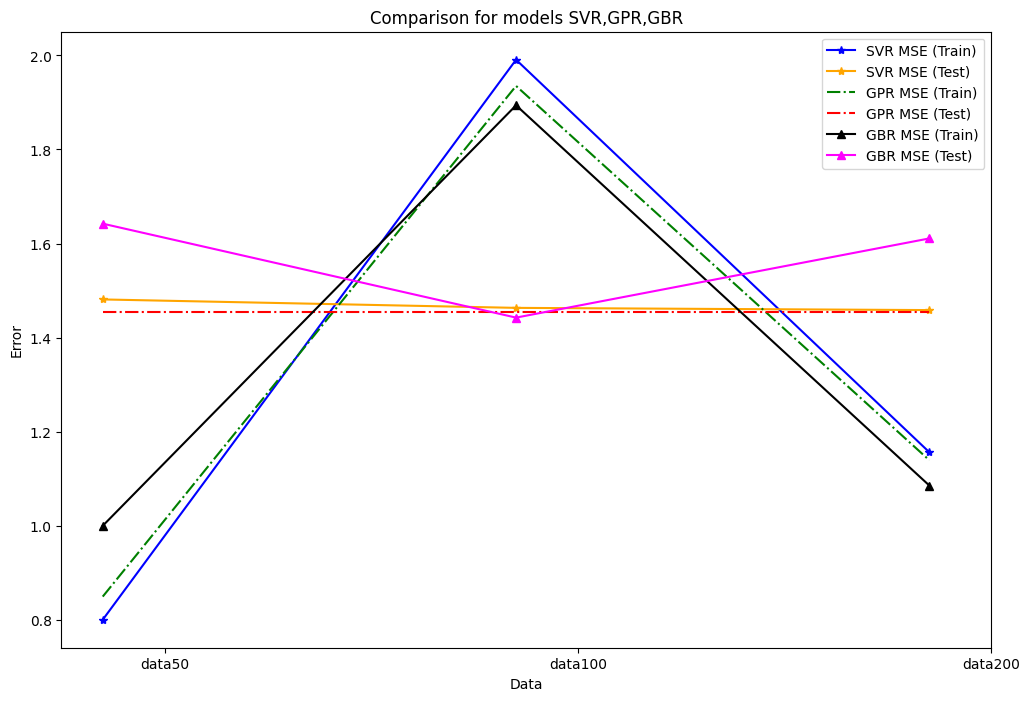

In [170]:

# plt.bar(test_list.index, test_list["MSE"],label = "test")
# plt.bar(train_resdf.index, train_resdf["MSE"], label = "train",alpha = 0.7)

def plot_regression_metrics(metric="MSE"):
    color_dict = dict(svr = ["blue", "orange"], gpr = ["green", "red"], gbr = ["black", "magenta"])
    pattern_dict = dict(svr = "-*", gpr = "-.", gbr = "-^")
    plt.figure(figsize = (12,8))
    models_types_list = ["svr", "gpr", "gbr"]
    for mtype in models_types_list: 
        train_resdf, test_resdf = train_test_metrics(mtype)
        barWidth = 0.3

        # Set the positions of the bars for train dataset
        r1 = np.arange(len(train_resdf))

        # Set the positions of the bars for test dataset
        r2 = [x + barWidth for x in r1]

        # Plot the bars for RMSE on train dataset
        plt.plot(r1, train_resdf[metric],  pattern_dict[mtype], label=f'{mtype.upper()} {metric} (Train)', color = color_dict[mtype][0])
        # plt.bar(r1, train_resdf[metric], color='b', width=barWidth, edgecolor='grey', label=f'{metric} (Train)')

        # Plot the bars for MSE on test dataset
        # plt.bar(r2, test_resdf[metric], color='r', width=barWidth, edgecolor='grey', label=f'{metric} (Test)')
        plt.plot(r1, test_resdf[metric], pattern_dict[mtype], label=f'{mtype.upper()} {metric} (Test)', color = color_dict[mtype][1])

        plt.xticks([r + barWidth/2 for r in range(len(train_resdf[metric]))], ['data50', 'data100', 'data200'])

        # Add labels and title
        plt.xlabel('Data')
        plt.ylabel('Error')
        plt.title(f'Comparison for models {",".join(models_types_list).upper()}')
        plt.legend()
    plt.show()

plot_regression_metrics("MSE")
# plot_regression_metrics("RMSE", "svr")

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
 33%|███▎      | 1/3 [00:06<00:12,  6.36s/it]c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The opt

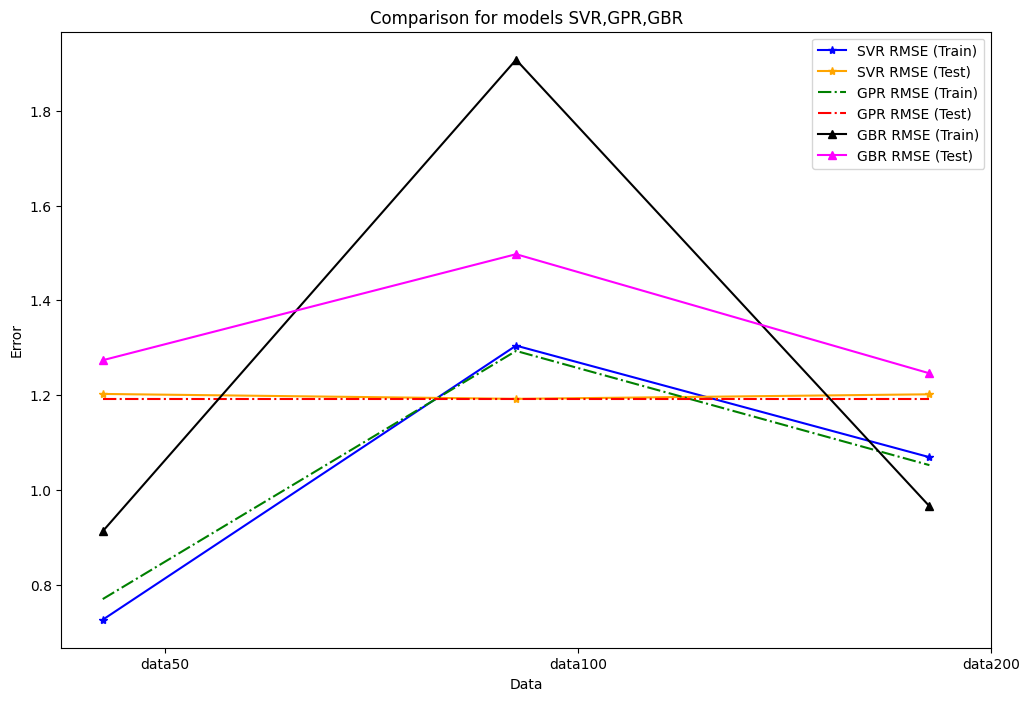

In [171]:
plot_regression_metrics("RMSE")

# Compare train50,100,200

In [90]:
# import torch
# import gpytorch
# from gpytorch.means import ConstantMean
# from gpytorch.kernels import RBFKernel
# from gpytorch.likelihoods import GaussianLikelihood

# # Initialize GP model and likelihood
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = ConstantMean()
#         self.covar_module = RBFKernel()

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
# # Generate synthetic data
# train_X = torch.linspace(0, 1, 10).unsqueeze(-1)
# train_Y = torch.sin(train_X * (2 * 3.1416)) + 0.1 * torch.randn_like(train_X)
# likelihood = GaussianLikelihood()
# model = ExactGPModel(train_X, train_Y, likelihood)
# mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

# # Set up optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
# for i in range(50):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean() 
#     loss.backward()
#     optimizer.step()
#     output_mean = output.mean
#     output_variance = output.variance
    
#     print("Iteration {}: Mean={}, Variance={}".format(i+1, output_mean, output_variance))

# # After optimization, get optimized parameters
# print("Optimized Likelihood Noise Level:", likelihood.noise.item())

In [21]:
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = train_X
#     print(test_X.shape)
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

In [22]:
# observed_pred.mean

In [23]:
# import torch
# import gpytorch
# import matplotlib.pyplot as plt

# # Define your training data (train_X, train_Y) and initialize your GP model and likelihood
# # Plot initial model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     test_X = torch.linspace(0, 1, 10).unsqueeze(-1)
#     print(test_X.shape)
#     observed_pred = model(test_X)
#     lower, upper = observed_pred.confidence_region()
    
#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Initial Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Initial Model Fit')
#     plt.show()

# # Optimization loop
# for i in range(10):
#     optimizer.zero_grad()
#     output = model(train_X)
#     loss = -mll(output, train_Y).mean()  # Calculate mean of the loss tensor
#     loss.backward()
#     optimizer.step()

#     # Plot updated model fit after each iteration
#     with torch.no_grad():
# #         model.eval()
# #         likelihood.eval()
#         observed_pred = likelihood(model(test_X))
#         lower, upper = observed_pred.confidence_region()

#         plt.figure(figsize=(12, 6))
#         plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#         plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label=f'Iteration {i+1}')
# #         plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#         plt.legend()
#         plt.title(f'Iteration {i+1}')
#         plt.show()

# # Plot final model fit
# with torch.no_grad():
# #     model.eval()
# #     likelihood.eval()
#     observed_pred = likelihood(model(test_X))
#     lower, upper = observed_pred.confidence_region()

#     plt.figure(figsize=(12, 6))
#     plt.scatter(train_X.numpy(), train_Y.numpy(), color='red', label='Training Data')
#     plt.plot(test_X.numpy(), observed_pred.mean.detach().numpy(), 'b', label='Final Model Fit')
# #     plt.fill_between(test_X.numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
#     plt.legend()
#     plt.title('Final Model Fit')
#     plt.show()

# Baesian optimization

In [24]:
try: 
    import gpytorch
except:
    %pip install gpytorch botorch -q
import random
import gpytorch
import botorch
import torch
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.constraints import Interval
from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition import UpperConfidenceBound, ExpectedImprovement
from botorch.optim import optimize_acqf
from sklearn.preprocessing import MinMaxScaler


def gaussian_noise(y):
    return random.gauss(0, 0.02*y)

In [25]:
scaler = MinMaxScaler()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.double

X = torch.tensor(scaler.fit_transform(data50["train"]["X"].values))
y = torch.tensor(data50["train"]["y"]).unsqueeze(-1)

model_local = SingleTaskGP(X, y)
mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local)
fit_gpytorch_mll(mll)

model_fix = SVR(**optimize("svr", data50, n_trials=20))
model_fix.fit(data50["train"]["X"], data50["train"]["y"])

c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\botorch\models\utils\assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([160.], dtype=torch.float64), std = tensor([14.1421], dtype=torch.float64)). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


SVR(C=0.6552725274125807)

## UCB AF

In [27]:
# UCB = UpperConfidenceBound(model_local, beta=0.1)
# #Optimizing acquisiton function
# lb = torch.Tensor([3, 850, 850, 53, 1700000, 136])
# rb = torch.Tensor([5, 1150, 1150, 73, 2300000, 184])

# bounds = torch.stack([lb, rb])
# candidate, acq_value = optimize_acqf(
#         UCB, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
#     )

# X_opt_ucb = scaler.inverse_transform(candidate)
# Y_opt_ucb = acq_value
# Y_bb_ucb = model_fix.predict(X_opt_ucb)
# print(X_opt_ucb)
# print(f"Our optimisation result {Y_opt_ucb}")
# print(f"Our blackbox result {Y_bb_ucb}") #our blackbox
# print(f"Initial max result {y.max()}")

## Expected Improvement AF

In [28]:
# EI = ExpectedImprovement(model_local, best_f=0.5, maximize = True)

# candidate, acq_value = optimize_acqf(
#         EI, bounds=bounds, q=1, num_restarts=5, raw_samples=100,
#     )

# X_opt_ei = scaler.inverse_transform(candidate)
# Y_opt_ei = acq_value
# Y_bb_ei = model_fix.predict(X_opt_ei)
# print(X_opt_ei)
# print(f"Our optimisation result {Y_opt_ei}")
# print(f"Our blackbox result {Y_bb_ei}") #our blackbox
# print(f"Initial max result {y.max()}")

In [29]:
# help(UpperConfidenceBound)

In [30]:
import numpy as np
try:
    import pySOT
except:
    !pip install pySOT -q
import numpy as np
from pySOT.strategy import DYCORSStrategy
from pySOT.auxiliary_problems import candidate_dycors
from pySOT.surrogate import gp
from pySOT.optimization_problems import OptimizationProblem, Hartmann3
from pySOT.experimental_design import SymmetricLatinHypercube
from poap.controller import ThreadController, SerialController

In [31]:
# Define the objective function
class Optim(OptimizationProblem):

    def __init__(self, dim=2, lower_bounds=None, upper_bounds=None):
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.array([])
        self.cont_var = np.arange(0, dim)
        self.info = str(dim) + "-dimensional black box"

    def eval(self, x):
        return x#(x[0] - 2) ** 2 + (x[1] + 3) ** 2

# Define the search space
lower_bounds = np.zeros(3)
upper_bounds = np.ones(3)


# Create an instance of the Optim class
optim = Hartmann3()#Optim(2, lower_bounds, upper_bounds)

# Create the GP surrogate model
surrogate = gp.GPRegressor(3, lower_bounds, upper_bounds)

# Create the experimental design
max_evals = 100
input_dimensionality=3
slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=max_evals-1)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.min()

c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\pySOT\strategy\dycors_strategy.py:89: RuntimeWarning: invalid value encountered in scalar divide
  prob_perturb = min([20.0 / self.opt_prob.dim, 1.0]) * (1.0 - (np.log(num_evals) / np.log(budget)))


-3.829037722234284

In [32]:
# lb = np.array([3, 850, 850, 53, 1700000, 136])
# rb = np.array([5, 1150, 1150, 73, 2300000, 184])
# reg = gp.GPRegressor(6, lb, rb)
# reg._X = data50["train"]["X"].values
# reg.fX =  data50["train"]["y"].values
# reg.predict(xx[10])

In [33]:
df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")
feature_cols = ['NUM_THREADS', 'TICKS_PER_SLOT', 'RECV_BATCH_MAX_CPU',
    'ITER_BATCH_SIZE', 'HASHES_PER_SECOND', 'TICKS_PER_SECOND']
# y column
target_col = ["AVERAGE_TPS_BENCH1"]
#initial X, y for trainig
X = df100_train[feature_cols].values
y = df100_train[target_col].values

best_params = optimize("gpr", data100, n_trials=2)
kernel = (ConstantKernel(constant_value=best_params["constant_value"]) +
    ConstantKernel(constant_value=best_params["constant_value"])*
    RBF(length_scale=best_params["length_scale"],  length_scale_bounds=(1e-010, 100000.0)) + WhiteKernel(noise_level=best_params["noise_level"])
            )
model_fix = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
model_fix.fit(X,y)


c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=2.08**2 + 2.08**2 * RBF(length_scale=4.36) + WhiteKernel(noise_level=9.97),
                         n_restarts_optimizer=2)

In [34]:
x = torch.tensor([4.000000e+00, 8.830000e+02, 8.500000e+02, 6.000000e+01, 2.233333e+06,
 1.790000e+02])

In [35]:
model_local.posterior(x.reshape(1,-1)).mean.item()

159.99981081649702

In [36]:
model_fix.predict(x.reshape(1,-1))[0]

27.327703747726588

In [37]:
import warnings 
warnings.simplefilter('ignore')
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
# Define the objective function
max_evals = 20
input_dimensionality=6


class Optim(OptimizationProblem):

    def __init__(self, dim=6, lower_bounds=None, upper_bounds=None):
        self.dim = dim
        self.lb = lower_bounds
        self.ub = upper_bounds
        self.int_var = np.arange(0, dim) 
        self.cont_var = np.array([])
        self.info = str(dim) + "-dimensional black box"

    def eval(self, x):
        # print(x)
        x=torch.tensor(x)
        return model_local.posterior(x.reshape(1,-1)).mean.item() #model_fix.predict(x.reshape(1,-1))[0]

# Define the search space
lower_bounds = np.array([3, 53, 850, 850, 1700000, 136])
upper_bounds = np.array([5, 73, 1150, 1150, 2300000, 184])

# standard_bounds = torch.stack(np.array([0]*6))

# Create an instance of the Optim class
optim = Optim(6, lower_bounds, upper_bounds)
surrogate = gp.GPRegressor(6, lower_bounds, upper_bounds)
# Create the GP surrogate model
# surrogate = RBFInterpolant(
#     dim=input_dimensionality, lb=lower_bounds, ub=upper_bounds, kernel=CubicKernel(), tail=LinearTail(input_dimensionality))

# surrogate._X = data50["train"]["X"].values
# surrogate.fX =  data50["train"]["y"].values

# Create the experimental design

slhd = SymmetricLatinHypercube(dim=input_dimensionality,num_pts=12)

# Create the DYCORSStrategy optimizer
strategy = DYCORSStrategy(max_evals=max_evals, opt_prob=optim, exp_design=slhd, 
                          surrogate=surrogate,
                         batch_size=1)
# optimizer.generate_evals(num_pts=10)

controller = SerialController(objective=optim.eval)
controller.strategy = strategy
controller.run()
results_serial = np.array([o.value for o in controller.fevals if o.value is not None])
results_serial.max(), results_serial

(159.99981081649702,
 array([159.99981082, 159.99981082, 159.99981082, 159.99981082,
        159.99981082, 159.99981082, 159.99981082, 159.99981082,
        159.99981082, 159.99981082, 159.99981082, 159.99981082,
        159.99981082, 159.99981082, 159.99981082, 159.99981082,
        159.99981082, 159.99981082, 159.99981082, 159.99981082]))

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from botorch.models import SingleTaskGP, ModelListGP
from gpytorch.mlls.sum_marginal_log_likelihood import SumMarginalLogLikelihood
from botorch import fit_gpytorch_model
from botorch.optim.optimize import optimize_acqf_list
from botorch.utils.transforms import unnormalize, normalize
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.utils.sampling import sample_simplex
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler
from botorch.utils.transforms import unnormalize, normalize
from surrogate_optimization import DYCORSOptimProblem, BayesianOptimizer


standard_bounds = torch.tensor([[0.0], [1.0]])
NUM_RESTARTS =  5
RAW_SAMPLES = 100
MC_SAMPLES = 256

def initialize_model(train_x, train_y):
    
    train_x = normalize(train_x, standard_bounds)
    model = SingleTaskGP(train_x, train_y)
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    return mll, model

def generate_next_candidate(x, y, n_candidates=1):
    
    mll, model = initialize_model(x, y)
    fit_gpytorch_model(mll)

    # sampler = SobolQMCNormalSampler(num_samples=MC_SAMPLES)

    train_x = normalize(x, standard_bounds)
    with torch.no_grad():
        pred = model.posterior(normalize(train_x,standard_bounds)).mean
    
    acq_fun = ExpectedImprovement(
        model=model,
    )

    candidates, _ = optimize_acqf(
        acq_function=acq_fun,
        bounds=standard_bounds,
        num_restarts=NUM_RESTARTS,
        raw_samples=RAW_SAMPLES,
        # options={
        #     "batch_limit": 5,
        #     "maxiter": 200,
        # }
    )

    return unnormalize(candidates, standard_bounds)
lb = torch.tensor([3, 53, 850, 850 , 1700000, 136])
ub = torch.tensor([5, 73, 1150, 1150 , 2300000, 184])
bounds = torch.stack([torch.tensor(lb,dtype=torch.float64), torch.tensor(ub,dtype=torch.float64)]) 

In [39]:
df100_train = pd.read_csv("data/out_slhc_design_train_100.csv")

#initial X, y for trainig
X = df100_train[feature_cols].values
y = df100_train[target_col].values

Xt = torch.tensor(X)
yt = torch.tensor(y)

lowb = Xt.min(dim=0).values
upb =  Xt.max(dim=0).values
bounds = torch.stack([lowb.type(torch.float64), upb.type(torch.float64)])
standard_bounds = torch.tensor([[0.0]*6, [1.0]*6])

train_x = normalize(Xt, bounds)
mll, model = initialize_model(train_x, yt)
fit_gpytorch_model(mll)

acq_fun = ExpectedImprovement(
        model=model,
        best_f=0.5,
        maximize=True
    )
candidates, _ = optimize_acqf(
    acq_function=acq_fun,
    q=1,
    bounds=standard_bounds,
    num_restarts=NUM_RESTARTS,
    raw_samples=RAW_SAMPLES,
)
candidate = unnormalize(candidates, bounds)
candidate, model.posterior(normalize(candidate, bounds).reshape(1,-1)).mean, model.posterior(candidate.reshape(1,-1)).variance

(tensor([[4.0057e+00, 5.8446e+01, 9.1446e+02, 9.4989e+02, 2.1001e+06, 1.4793e+02]],
        dtype=torch.float64),
 tensor([[30.7147]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>),
 tensor([[1.9403]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>))

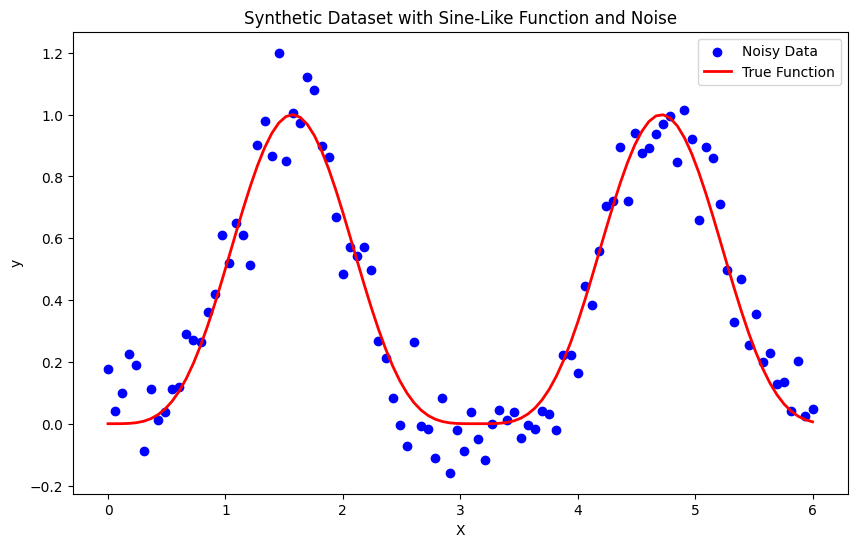

In [40]:
np.random.seed(0)
lb = torch.tensor([0])
ub = torch.tensor([6])

bounds = torch.stack([lb.type(torch.float64), ub.type(torch.float64)])
standard_bounds = torch.tensor([[0.0], [1.0]])

Xd = np.linspace(bounds[0][0],bounds[1][0], 100)[:, np.newaxis]
def obj_dummy(x):
    return np.sin(x)**4
yd = obj_dummy(Xd) + np.random.normal(0, 0.1, Xd.shape)

# Plot the generated data
def plot_dummy_optim(Xd, yd):
    plt.figure(figsize=(10, 6))
    plt.scatter(Xd, yd, color='blue', label='Noisy Data')
    plt.plot(Xd, obj_dummy(Xd), color='red', linewidth=2, label='True Function')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Synthetic Dataset with Sine-Like Function and Noise')
    plt.legend()
plot_dummy_optim(Xd, yd)

In [41]:
import matplotlib.pyplot as plt

# def prep_data(samp_size=100):
#     X = df100_train[feature_cols].values
#     y = df100_train[target_col].values
#     lb = torch.tensor([3, 53, 850, 850 , 1700000, 136])
#     ub = torch.tensor([5, 73, 1150, 1150 , 2300000, 184])
    
#     bounds = torch.stack([lb.type(torch.float64), ub.type(torch.float64)])
#     Xt = torch.tensor(X[:samp_size])
#     yt = torch.tensor(y[:samp_size])
#     train_x = normalize(Xt, bounds)
#     return Xt, yt, train_x, bounds

botorch_optim = BayesianOptimizer(bounds, standard_bounds)
optimizer = botorch_optim.optimize_DYCORS
print(Xd.shape, yd.shape)
gaussprocess =  botorch_optim.train_botorch_surrogate(Xd, yd)

def get_gp_means_std(train_x,gaussprocess, standard_bounds):

    # posteriors_unscaled = [gp.posterior(torch.tensor(X[i].reshape(1,-1))) for i in range(len(X))]
    posterirors_scaled = [gaussprocess.posterior(torch.tensor(train_x[i].reshape(1,-1))) for i in range(len(train_x))]
    means_scaled = [p.mean.item() for p in posterirors_scaled]
    std_scaled = [(p.variance.item())**(1/2) for p in posterirors_scaled]
    # means_unscaled = [p.mean.item() for p in posteriors_unscaled]

    x_grid_scaled = torch.tensor([np.linspace(standard_bounds[0][i],standard_bounds[1][i], len(Xt) ) for i in range(train_x.shape[1])]).T
    # x_grid_unscaled = torch.tensor([np.linspace(lowb[i],upb[i], len(X) ) for i in range(len(lb)) ]).T
    means_grid_scaled =[gaussprocess.posterior(torch.tensor(x_grid_scaled[i].reshape(1,-1))).mean.item() for i in range(len(Xt))]
    # means_grid_unscaled = [gaussprocess.posterior(torch.tensor(x_grid_unscaled[i].reshape(1,-1))).mean.item() for i in range(len(X))]
    return means_scaled, std_scaled

def get_next_point(optimizer, Xt, yt,gaussprocess, bounds):

    cand = normalize(torch.tensor(optimizer(Xt,yt)), bounds)
    y = gaussprocess(cand.reshape(1,-1)).mean
    if optimizer.__name__ == "optimize_UCB":
        cand, y = botorch_optim.optimal_points_dict["UCB"]
    if optimizer.__name__ == "optimize_EI":
        cand, y = botorch_optim.optimal_points_dict["EI"]
        y=gaussprocess(cand.reshape(1,-1)).mean   
    if optimizer.__name__ == "optimize_TS":
        cand, _= botorch_optim.optimal_points_dict["TS"] 
        y = gaussprocess(cand.reshape(1,-1)).mean       
    if optimizer.__name__ == "optimize_DYCORS":
        cand, _= botorch_optim.optimal_points_dict["DYCORS"] 
        y = gaussprocess(cand.reshape(1,-1)).mean       
    return cand.cpu().detach().numpy(), y.detach().numpy()

for optim in [botorch_optim.optimize_DYCORS, botorch_optim.optimize_EI, botorch_optim.optimize_TS]:
    print(get_next_point(optim, Xd, yd, gaussprocess, bounds))
    
botorch_optim.optimal_points_dict

(100, 1) (100, 1)
(array([0.26448959]), array([1.01775867]))
(array([0.26513004], dtype=float32), array([1.01779306]))
(array([0.26128006], dtype=float32), array([1.01655716]))


{'DYCORS': [tensor([0.2645], dtype=torch.float64),
  tensor(1.0178, dtype=torch.float64)],
 'EI': [tensor([0.2651]), tensor(0.5178, dtype=torch.float64)],
 'TS': [tensor([0.2613]), None]}

In [42]:
def plot_gp(Xd, train_x, y, gaussprocess, gp_means, gp_stds, dim = 3,
            optimizers = [botorch_optim.optimize_TS, botorch_optim.optimize_EI, 
                          botorch_optim.optimize_UCB, botorch_optim.optimize_DYCORS],bounds=bounds ):
    
    x_sort = np.sort(train_x[:,dim])
    x_sort_args = np.argsort(train_x[:,dim])
    y_sort = y[x_sort_args]
    std_sort = np.array(gp_stds)[x_sort_args]
    gp_means_sort  = np.array(gp_means)[x_sort_args]
    
    plt.figure(figsize=(12,5))
    colors = ["red", "orange", "magenta", "yellow"]
    for i, optim in enumerate(optimizers):
        opt_name = (f"{optim=}".split("=")[1][:-2]).split(" ")[2].split("_")[-1]
        x_next, y_gp_next = get_next_point(optim, Xd, yd, gaussprocess, bounds)
        print(f'Points of {opt_name}', x_next, y_gp_next)
        plt.plot(x_next[dim], y_gp_next, 'o', color = colors[i], lw=2)
        rand_offset = np.random.random()/10
        plt.text(x_next[dim]-x_next[dim]*rand_offset, y_gp_next+y_gp_next*rand_offset, f"{opt_name}")
    
    plt.plot(x_sort, y_sort, label = "black-box values")
    plt.plot(x_sort, gp_means_sort, label = "gp means")
    plt.fill_between(x=x_sort, y1 = gp_means_sort - std_sort, y2 = gp_means_sort+std_sort, alpha = 0.4, color = "orange", label="+- std")
    plt.legend()
    
# Xt, yt, train_x = prep_data(50)
# means_scaled, std_scaled = get_gp_means_std(train_x,gaussprocess)
# plot_gp(train_x, yt,gaussprocess,means_scaled, std_scaled)

In [43]:
standard_bounds = np.stack([[0.0], [1.0]])
def prep_dummy_data(bounds =bounds, size=100):
    bounds = torch.tensor(bounds)
    np.random.seed(0)
    Xd = np.linspace(bounds[0],bounds[1], size)
    yd = obj_dummy(Xd) + np.random.normal(0, 0.1, Xd.shape)
    Xt = torch.tensor(Xd)
    yt = torch.tensor(yd)
    train_x = normalize(Xt, bounds)
    return Xt, yt, train_x

botorch_optim = BayesianOptimizer(bounds, standard_bounds)
optimizer = botorch_optim.optimize_DYCORS
Xd, yd, train_x = prep_dummy_data()
print(Xd.shape, yd.shape)
gaussprocess =  botorch_optim.train_botorch_surrogate(Xd, yd)
means_scaled, std_scaled = get_gp_means_std(train_x,gaussprocess, standard_bounds)

xmin_scaled, ymin = get_next_point(botorch_optim.optimize_DYCORS,Xd,yd,gaussprocess,bounds)
print(xmin_scaled, ymin)
xmin = unnormalize(torch.tensor(xmin_scaled), bounds).numpy()

# plot_dummy_optim(Xd,yd)
# plt.plot(xmin ,ymin, "o", color = "orange")
# plt.plot(Xd, means_scaled , label="surrogate")
# plt.legend()

torch.Size([100, 1]) torch.Size([100, 1])
[0.26448959] [1.01775867]


In [44]:
gaussprocess(torch.tensor([0.07944516]).reshape(1,-1)).mean

tensor([0.0910], dtype=torch.float64, grad_fn=<ViewBackward0>)

In [45]:
get_next_point(botorch_optim.optimize_DYCORS,Xd,yd,gaussprocess,bounds)

(array([0.26510578]), array([1.01779301]))

In [46]:
from pySOT.optimization_problems import Hartmann3
class DYCORSOptimProblem(OptimizationProblem):

    def __init__(self, X, y,objective:callable, dim=6,bounds=None, standard_bounds=None):
        self.best_x = []
        self.dim = dim
        self.lb = np.array(bounds[0])
        self.ub = np.array(bounds[1])
        self.int_var = []
        self.cont_var = np.arange(0, dim) 
        self.info = str(dim) + "-dimensional black box"

        self.X = np.array(normalize(torch.tensor(X), bounds))
        self.y=y
        self.objective = objective

        
    def obj(self,x: np.array):
        return self.objective(x)

    def train_surrogate(self, X, y):
        surrogate = gp.GPRegressor(self.dim, self.lb, self.ub)
        surrogate.updated = False
        surrogate._X = X
        surrogate.fX =  y
        surrogate._fit()
        return surrogate
        
    def eval(self, x):
        self.__check_input__(x)
        self.best_x.append(x)
        return -self.obj(x)[0]#surrogate.predict(x)[0]
    

input_dimensionality=1
#optim = SineFunction(input_dimensionality)

model_local = botorch_optim.train_botorch_surrogate(Xd,yd)
def obj(x, model_local):
    x = torch.tensor(x)
    return model_local.posterior(normalize(x, bounds).reshape(1,-1)).mean.cpu().detach().numpy()[0]

optim = DYCORSOptimProblem(np.array(Xt), -np.array(yt),lambda x: obj(x, model_local),input_dimensionality, bounds, standard_bounds)
surrogate = gp.GPRegressor(input_dimensionality,  optim.lb, optim.ub)

slhd = SymmetricLatinHypercube(dim=optim.dim, num_pts=2*(optim.dim+1))   
num_runs = 1
max_evals = 50
results_serial = np.zeros((max_evals, num_runs))

runs = 1
for _ in range(runs):
    controller = SerialController(objective=optim.eval)
    controller.strategy = DYCORSStrategy(
        max_evals=max_evals, opt_prob=optim, asynchronous=False, 
        exp_design=slhd, surrogate=surrogate, num_cand=100*optim.dim,
        batch_size=1)

    result = controller.run()
    print(-controller.best_point().value, optim.best_x[-1], normalize(torch.tensor(optim.best_x[-1]), bounds))


1.0177352641639252 [1.39104378] tensor([0.2318], dtype=torch.float64)


In [47]:
argmin = np.argmin([controller.fevals[i].value for i in range(len(controller.fevals))])
optim.best_x[argmin]

array([1.58579789])

In [48]:

# from botorch.utils.sampling import draw_sobol_samples
# from botorch.generation import MaxPosteriorSampling
# def train_botorch_surrogate(X: np.array, y: np.array): 
#     """ Trains SingleTaskGP botorch surrogate model.
#     """         
#     train_X = normalize(torch.tensor(X), bounds)
#     y = torch.tensor(y)
#     model_local = SingleTaskGP(train_X, y) 
#     mll = ExactMarginalLogLikelihood(model_local.likelihood, model_local) 
#     fit_gpytorch_mll(mll)  
#     return model_local 

# def optimize_TS(X: np.array, y: np.array, bounds,standard_bounds,num_candidates=1):
#     """ """
#     standard_bounds  = torch.tensor(standard_bounds)
#     X_cand = draw_sobol_samples(standard_bounds,1,10)[0]
#     model_local = train_botorch_surrogate(X, y) 
#     thompson_sampling = MaxPosteriorSampling(model=model_local, replacement=True)
#     candidate = thompson_sampling(X_cand, num_samples=num_candidates)

#     candidate = unnormalize(candidate ,bounds)
         
#     return candidate

# Xcat, ycat = Xt, yt
# max_evals=1
# for _ in range(max_evals):
#     cand =optimize_TS(Xcat,ycat, bounds, standard_bounds)
#     y_obj = obj_dummy(cand)
#     Xcat, ycat = torch.cat([Xcat, cand]), torch.cat([ycat, y_obj])
#     print(normalize(cand, bounds), y_obj)

In [49]:
botorch_optim.optimize_TS(Xd,yd, 10)
botorch_optim.optimal_points_dict

{'DYCORS': [tensor([0.2651], dtype=torch.float64),
  tensor(1.0178, dtype=torch.float64)],
 'TS': [tensor([0.1996], dtype=torch.float64), None]}

Points of TS [0.78727835] [0.96039848]
Points of EI [0.26513014] [1.01779306]
Points of UCB [0.26513014] 1.0290683881403144
Points of DYCORS [0.26501487] [1.01779194]


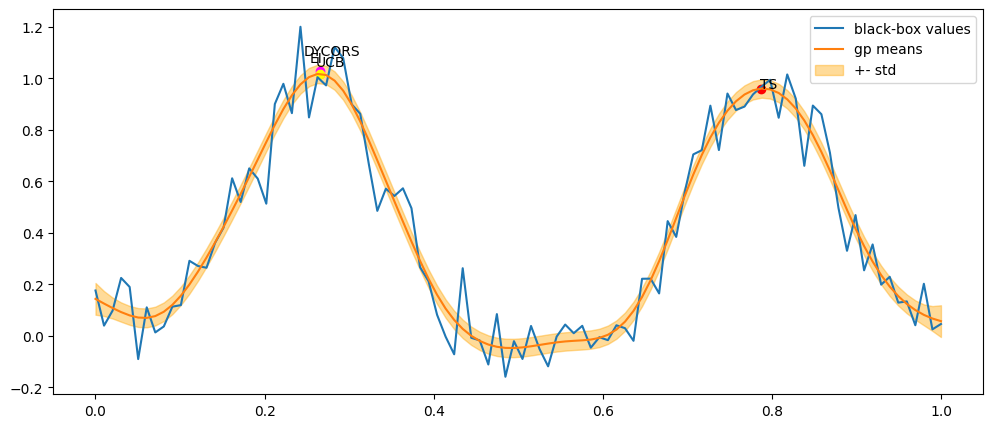

In [58]:
from pySOT.surrogate import gp
plot_gp(Xd,train_x, yd, gaussprocess, means_scaled, std_scaled, dim = 0,
            optimizers = [botorch_optim.optimize_TS, botorch_optim.optimize_EI, 
                          botorch_optim.optimize_UCB, botorch_optim.optimize_DYCORS] ,bounds=bounds)

In [51]:
!pip show POAP

Name: POAP
Version: 0.1.26
Summary: Python Optimization Asynchronous Plumbing.
Home-page: http://pypi.python.org/pypi/POAP/
Author: David Bindel
Author-email: bindel@cornell.edu
License: LICENSE.txt
Location: c:\users\egatiyatullin\desktop\myprojects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages
Requires: 
Required-by: pySOT


# Cumulative max

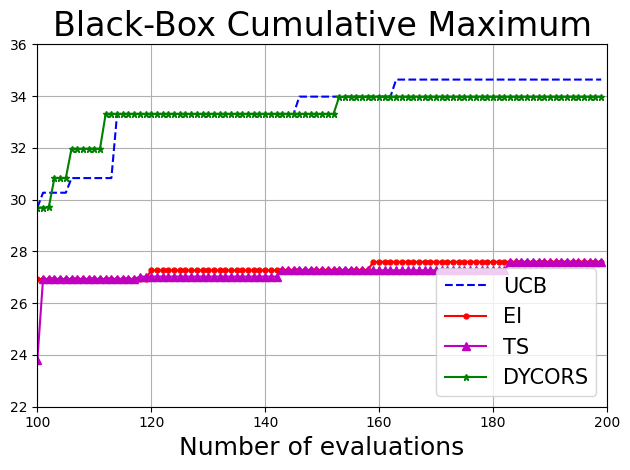

In [59]:
af_train_paths = ["data/af_train_UCB.csv", "data/af_train_EI.csv", 
                  "data/af_train_TS.csv","data/af_train_DYCORS.csv"]

def plot_cumulative_max(af_train_paths):
    start_point = 100
    Y_UCB = pd.read_csv(af_train_paths[0])["AVERAGE_TPS_BENCH1"][start_point:]
    Y_EI = pd.read_csv(af_train_paths[1])["AVERAGE_TPS_BENCH1"][start_point:]
    Y_TS = pd.read_csv(af_train_paths[2])["AVERAGE_TPS_BENCH1"][start_point:]
    Y_DYCORS = pd.read_csv(af_train_paths[3])["AVERAGE_TPS_BENCH1"][start_point:]
    results = [
        (Y_UCB, f"UCB", "b", "", 10, "--"),
        (Y_EI, f"EI", "r", ".", 7, "-"),
        (Y_TS, f"TS", "m", "^", 6, "-"),
        (Y_DYCORS, f"DYCORS", "g", "*", 5, "-"),
    ]
    names = []
    for res, name, c, m, ms, ls in results:
        names.append(name)
        fx = res.cummax()
        t = start_point + np.arange(len(fx))
        plt.plot(t, fx, c=c, marker=m, linestyle=ls, markersize=ms)
        
    #plt.plot([0, max_evals], [hart6.optimal_value, hart6.optimal_value], "k--", lw=3)
    plt.xlabel("Function value", fontsize=18)
    plt.xlabel("Number of evaluations", fontsize=18)
    plt.title("Black-Box Cumulative Maximum", fontsize=24)
    plt.xlim([start_point, 200])
    plt.ylim([22, 36])

    plt.grid(True)
    plt.tight_layout()
    plt.legend(
        names + ["Global optimal value"],
        loc="lower right",
        ncol=1,
        fontsize=15,
    )
    plt.show()
        
plot_cumulative_max(af_train_paths)

In [53]:
Y_UCB = pd.read_csv("data/af_train_UCB.csv")["AVERAGE_TPS_BENCH1"]
Y_EI = pd.read_csv("data/af_train_EI.csv")["AVERAGE_TPS_BENCH1"]
Y_TS = pd.read_csv("data/af_train_TS.csv")["AVERAGE_TPS_BENCH1"]
Y_DYCORS = pd.read_csv("data/af_train_DYCORS.csv")["AVERAGE_TPS_BENCH1"]

(np.all(Y_TS.cummax() == Y_EI.cummax()) ,np.all(Y_TS.cummax() == Y_DYCORS.cummax()) , 
np.all(Y_EI.cummax() == Y_DYCORS.cummax()))

(True, False, False)

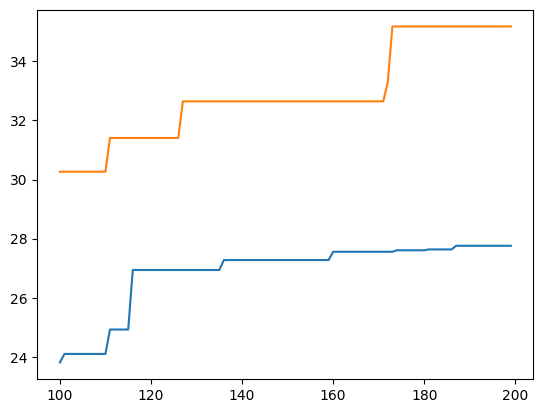

In [54]:
# plt.plot(range(100,200,1),Y_EI[100:], "o")
# plt.plot(range(100,200,1),Y_DYCORS[100:] , "o")
plt.plot(range(100,200,1),Y_EI[100:].cummax())
plt.plot(range(100,200,1),Y_DYCORS[100:].cummax())

In [55]:
Y

NameError: name 'Y' is not defined

In [ ]:
import os
import pandas as pd
import torch
import numpy as np
from surrogate_optimization import DYCORSOptimProblem, BayesianOptimizer
feature_cols = ['NUM_THREADS', 'TICKS_PER_SLOT', 'RECV_BATCH_MAX_CPU',
        'ITER_BATCH_SIZE', 'HASHES_PER_SECOND', 'TICKS_PER_SECOND']
target_col = ["AVERAGE_TPS_BENCH1"]

# lower and upper bound for X candidates seacrh
lb = torch.tensor([3, 53, 850, 850 , 1700000, 136])
ub = torch.tensor([5, 73, 1150, 1150 , 2300000, 184])
bounds = torch.stack([lb.type(torch.float64), ub.type(torch.float64)])
standard_bounds = np.stack([[0.0]*6, [1.0]*6])
af_type = "DYCORS"
af_train = pd.read_csv(os.path.join("data", "out_slhc_design_train_100.csv"))
N = 101
n = len(af_train)
if n >= N:
    print(f"{af_type} training complete, exiting...")
    exit(0)

for i in range(n, N):
    print(f"Generating {i+1} candidate...")
    # X, y for trainig
    X = af_train[feature_cols].values
    y = af_train[target_col].values

    botorch_optim = BayesianOptimizer(bounds, standard_bounds)
    if af_type == "EI":
        candidate = botorch_optim.optimize_EI(X, y)
    elif af_type == "TS":
        candidate = botorch_optim.optimize_TS(X, y)
    elif af_type == "UCB":
        candidate = botorch_optim.optimize_UCB(X, y)
    elif af_type == "DYCORS":
        candidate = botorch_optim.optimize_DYCORS(X, y)
    else:
        print(f"{af_type} optimization not implemented.")
        exit(1)
    print(f"{af_type} candidate {candidate}")
    candidate_series = pd.Series(data=candidate, index=feature_cols)


c:\Users\EGatiyatullin\Desktop\MyProjects\repos\2024\masters_thesis_blockchain\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generating 101 candidate...
DYCORS candidate [      4      58     921     940 1814438     144]


$\tilde f$
